<a href="https://colab.research.google.com/github/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/blob/main/TCC_Andr%C3%A9_Melo_Pos_CESAR_SCHOOL_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desenvolvimento para o Trabalho de Conclusão de Curso (TCC) de **André Victor Costa de Melo** apresentado ao programa de Especialização em Análise e Engenharia de Dados do Centro de Estudos e Sistemas Educacionais do Recife – C.E.S.A.R.


Link das bases de dados: https://github.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED

## Importação de Bibliotecas

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.svm import SVC
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

## Importação de Bases

In [108]:
df_order_items = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/main/olist_order_items_dataset.csv", sep=',', decimal='.')
df_order_payments = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/main/olist_order_payments_dataset.csv", sep=',', decimal='.')
df_order_reviews = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/main/olist_order_reviews_dataset.csv", sep=',', decimal='.')
df_orders = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/main/olist_orders_dataset.csv", sep=',', decimal='.')
df_products = pd.read_csv("https://raw.githubusercontent.com/andrevcmelo/TCC_Andre_Melo_Pos-CESAR_SCHOOL_AED/main/olist_products_dataset.csv", sep=',', decimal='.')

In [109]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [110]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [111]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [112]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [113]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Pré-processamento de Dados

**Passo 1:** Criando as features da tabela `df_order_items` e `df_products`

In [114]:
#Coletando a quantidade de fotos por produto da tabela 'df_products' para o detalhamento das ordens 'df_order_items'

df_items_prod = df_order_items.merge(df_products, left_on='product_id', right_on='product_id')
df_items_prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [115]:
#Criando campos a partir da tabela 'df_order_items':
#1) Qtd de produtos na ordem
#2) Valor Total
#3) Valor Frete
#4) Qtd de produtos distintos na ordem
#5) Média de fotos por ordem

df_order_items_calc = df_items_prod.groupby('order_id').agg(
             total_price=('price', 'sum'),
             total_freight=('freight_value', 'sum'),
             qty_products=('product_id', 'count'),
             qty_uniq_products=('product_id', 'nunique'),
             mean_photos_order=('product_photos_qty', 'mean')
)
df_order_items_calc.reset_index(inplace=True)
df_order_items_calc.head(5)

,order_id,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,1,4.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,1,2.0
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,1,2.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,1,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,1,1.0


**Passo 2:** Criando as features da tabela `df_review_users`

In [116]:
#Criando campo de data da compra em formato datetime
df_orders['order_purchase_datetime'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_purchase_datetime'] = df_orders['order_purchase_datetime'].dt.strftime('%Y-%m-%d')

#Criando tabela com a quantidade de reviews por usuário, por data
df_review_users = df_orders.merge(df_order_reviews, left_on='order_id', right_on='order_id')
df_review_users.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datetime,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [117]:
#Criando df com a quantidade de reviews por usuáriono e a média das notas atribuidas formato YYYY-MM-DD
df_review_users['review_answer_timestamp'] = pd.to_datetime(df_review_users['review_answer_timestamp'])
df_review_users['review_answer_timestamp'] = df_review_users['review_answer_timestamp'].dt.strftime('%Y-%m-%d')

# Deletando reviews duplicadas por erro de base
df_review_users = df_review_users.drop_duplicates(subset = ['order_id','review_answer_timestamp'], keep='first')

In [118]:
df_review_users_calc = df_review_users.groupby(['customer_id','review_answer_timestamp']).agg(
             qty_reviews=('review_id', 'count'),
             mean_reviews=('review_score', 'mean')
)
df_review_users_calc.reset_index(inplace=True)
df_review_users_calc.head()

,customer_id,review_answer_timestamp,qty_reviews,mean_reviews
0,00012a2ce6f8dcda20d059ce98491703,2017-12-04,1,1
1,000161a058600d5901f007fab4c27140,2017-07-27,1,4
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-08,1,5
3,0002414f95344307404f0ace7a26f1d5,2017-09-15,1,5
4,000379cdec625522490c315e70c7a9fb,2018-04-16,1,4


In [119]:
df_orders_aux = df_orders[['order_id', 'customer_id', 'order_purchase_datetime']]
df_orders_reviews_aux= pd.merge(df_orders_aux, df_review_users_calc, how='outer', on=['customer_id', 'customer_id'])
df_orders_reviews_aux

,order_id,customer_id,order_purchase_datetime,review_answer_timestamp,qty_reviews,mean_reviews
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-12,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,2018-08-08,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,2018-08-22,1,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18,2017-12-05,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13,2018-02-18,1,5
...,...,...,...,...,...,...
99824,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09,2017-03-23,1,5
99825,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06,2018-03-02,1,4
99826,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27,2017-09-22,1,5
99827,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,2018-01-27,1,2


In [120]:
df_orders_reviews_aux_2 = df_orders_reviews_aux.loc[df_orders_reviews_aux['order_purchase_datetime'] <= df_orders_reviews_aux['review_answer_timestamp']]
df_orders_reviews_aux_2

,order_id,customer_id,order_purchase_datetime,review_answer_timestamp,qty_reviews,mean_reviews
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-12,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,2018-08-08,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,2018-08-22,1,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18,2017-12-05,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13,2018-02-18,1,5
...,...,...,...,...,...,...
99824,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09,2017-03-23,1,5
99825,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06,2018-03-02,1,4
99826,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27,2017-09-22,1,5
99827,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,2018-01-27,1,2


In [121]:
df_orders_review_calc = df_orders_reviews_aux_2.groupby(['order_id','customer_id','order_purchase_datetime']).agg(
             qty_reviews=('qty_reviews', 'sum'),
             mean_reviews=('mean_reviews', 'mean')
)
df_orders_review_calc.reset_index(inplace=True)
df_orders_review_calc

,order_id,customer_id,order_purchase_datetime,qty_reviews,mean_reviews
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26,1,4.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04,1,5.0
...,...,...,...,...,...
99378,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23,1,5.0
99379,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,2018-07-14,1,5.0
99380,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,2017-10-23,1,5.0
99381,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,2017-08-14,1,5.0


**Passo 3:** Criando as features da tabela `df_order_payments`

In [122]:
def boolean_result(x):
  if x > 0:
    a = 1
  else:
    a = 0
  return a

In [123]:
#As features serão:
#1) Qtd métodos de pagamentos
#2) Com voucher (sim-1; não-0)

df_order_payments_aux = df_order_payments.loc[:, ['order_id','payment_type']].reset_index()
df_order_payments_aux2 = pd.pivot_table(data = df_order_payments_aux, index=['order_id'], columns=['payment_type'], aggfunc= 'nunique', fill_value=0)
df_order_payments_aux3 = df_order_payments_aux2['index']
df_order_payments_aux3.reset_index(inplace=True)
df_order_payments_aux3.rename_axis(None, axis=1, inplace=True)
df_order_payments_aux3['with_voucher'] = 0
df_order_payments_aux3['with_voucher'] = df_order_payments_aux3['with_voucher'].astype('int')

for i in range(0, len(df_order_payments_aux3['voucher'])):
  df_order_payments_aux3.loc[i, 'voucher'] = boolean_result(df_order_payments_aux3.loc[i, 'voucher'])
  df_order_payments_aux3.loc[i, 'boleto'] = boolean_result(df_order_payments_aux3.loc[i, 'boleto'])
  df_order_payments_aux3.loc[i, 'credit_card'] = boolean_result(df_order_payments_aux3.loc[i, 'credit_card'])
  df_order_payments_aux3.loc[i, 'debit_card'] = boolean_result(df_order_payments_aux3.loc[i, 'debit_card'])
  df_order_payments_aux3.loc[i, 'not_defined'] = boolean_result(df_order_payments_aux3.loc[i, 'not_defined'])
  if df_order_payments_aux3.loc[i, 'voucher'] > 0:
    df_order_payments_aux3.loc[i, 'with_voucher'] = 1
  else:
    df_order_payments_aux3.loc[i, 'with_voucher'] = 0

df_order_payments_aux3['qty_payment_methods'] = df_order_payments_aux3['boleto'] + df_order_payments_aux3['credit_card'] + df_order_payments_aux3['debit_card'] + df_order_payments_aux3['not_defined'] + df_order_payments_aux3['voucher']
df_order_payments_aux3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,order_id,boleto,credit_card,debit_card,not_defined,voucher,with_voucher,qty_payment_methods
0,00010242fe8c5a6d1ba2dd792cb16214,0,1,0,0,0,0,1
1,00018f77f2f0320c557190d7a144bdd3,0,1,0,0,0,0,1
2,000229ec398224ef6ca0657da4fc703e,0,1,0,0,0,0,1
3,00024acbcdf0a6daa1e931b038114c75,0,1,0,0,0,0,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,1,0,0,0,0,1


In [124]:
df_products_calc = df_order_payments_aux3[['order_id', 'with_voucher', 'qty_payment_methods']]

**Passo 4:** Juntando as features em um único dataset.

In [125]:
df_orders_join1= pd.merge(df_orders, df_order_items_calc, how='left', on=['order_id', 'order_id'])
df_orders_join1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datetime,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,29.99,8.72,1.0,1.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,118.70,22.76,1.0,1.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,159.90,19.22,1.0,1.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,45.00,27.20,1.0,1.0,3.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,19.90,8.72,1.0,1.0,4.0


In [126]:
df_orders_join2 = pd.merge(df_orders_join1, df_orders_review_calc[['qty_reviews','mean_reviews', 'order_id']], how='left', on=['order_id', 'order_id'])
df_orders_join2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datetime,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order,qty_reviews,mean_reviews
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,29.99,8.72,1.0,1.0,4.0,1.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,118.70,22.76,1.0,1.0,1.0,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,159.90,19.22,1.0,1.0,1.0,1.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,45.00,27.20,1.0,1.0,3.0,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,19.90,8.72,1.0,1.0,4.0,1.0,5.0


In [127]:
df_orders_final = pd.merge(df_orders_join2, df_products_calc[['with_voucher', 'qty_payment_methods', 'order_id']], how='left', on=['order_id', 'order_id'])
df_orders_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datetime,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order,qty_reviews,mean_reviews,with_voucher,qty_payment_methods
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,29.99,8.72,1.0,1.0,4.0,1.0,4.0,1.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,118.70,22.76,1.0,1.0,1.0,1.0,4.0,0.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,159.90,19.22,1.0,1.0,1.0,1.0,5.0,0.0,1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,45.00,27.20,1.0,1.0,3.0,1.0,5.0,0.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,19.90,8.72,1.0,1.0,4.0,1.0,5.0,0.0,1.0


In [128]:
def target_result(x):
  if x == 'unavailable' or x == 'canceled':
    a = 1
  else:
    a = 0
  return a

In [129]:
#Criando coluna de hora da compra
df_orders_final['purchase_hour'] = pd.to_datetime(df_orders_final['order_purchase_timestamp']).dt.hour

In [130]:
#Criando coluna de target, onde:
# 0 = não cancelada
# 1 = cancelada

for i in range(0, len(df_orders_final)):
  df_orders_final.loc[i,'target'] = target_result(df_orders_final.loc[i,'order_status'])


In [131]:
df_orders_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_datetime,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order,qty_reviews,mean_reviews,with_voucher,qty_payment_methods,purchase_hour,target
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,29.99,8.72,1.0,1.0,4.0,1.0,4.0,1.0,2.0,10,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,118.70,22.76,1.0,1.0,1.0,1.0,4.0,0.0,1.0,20,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,159.90,19.22,1.0,1.0,1.0,1.0,5.0,0.0,1.0,8,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,45.00,27.20,1.0,1.0,3.0,1.0,5.0,0.0,1.0,19,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,19.90,8.72,1.0,1.0,4.0,1.0,5.0,0.0,1.0,21,0.0


Selecionando as features do dataset final

In [132]:
df_final = df_orders_final[['order_id','total_price','total_freight','qty_products','qty_uniq_products','mean_photos_order','qty_reviews','mean_reviews','with_voucher','qty_payment_methods','purchase_hour','target']]
df_final_cancel = df_orders_final[df_orders_final['target']==1].reset_index(drop=True)

## Análise Exploratória de Dados

In [133]:
def tabela_frequencia_categoria(data, col):
  frequencia = round(data[col].value_counts(normalize = True) * 100,2)
  distribuicao = data[col].value_counts()
  tabela = pd.DataFrame({'Distribuicao': distribuicao, 'Frequencia (%)': frequencia})
  tabela.rename_axis('Atributos', axis = 1, inplace = True)
  return tabela.style.format("{:,.2f}").background_gradient(axis = 0, cmap = 'Oranges')

### Dataset completo

In [134]:
tabela_frequencia_categoria(df_final,'target')

Atributos,Distribuicao,Frequencia (%)
0.0,"98,207.00",98.76
1.0,"1,234.00",1.24


In [135]:
#K = número de intervalos de categoria para auxiliar em análises, utilizando a Regra de Sturges
k = int(1 + ((10/3) * np.log10(len(df_final))))

aux_df_final = df_final
#1.
aux_df_final['classe_total_price'] = pd.cut(x = aux_df_final['total_price'], bins = k, include_lowest=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
tabela_frequencia_categoria(aux_df_final,'classe_total_price')

Atributos,Distribuicao,Frequencia (%)
"(-12.59, 791.388]","97,027.00",98.34
"(791.388, 1581.926]","1,278.00",1.30
"(1581.926, 2372.465]",273.00,0.28
"(2372.465, 3163.003]",61.00,0.06
"(3953.541, 4744.079]",10.00,0.01
"(3163.003, 3953.541]",10.00,0.01
"(6325.156, 7115.694]",3.00,0.00
"(7115.694, 7906.232]",1.00,0.00
"(5534.618, 6325.156]",1.00,0.00
"(4744.079, 5534.618]",1.00,0.00


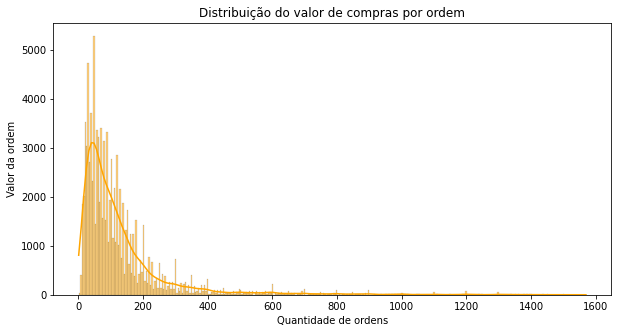

In [137]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final[df_final['total_price'] < 1582], x = 'total_price', kde=True, color='orange')
ax.set_title('Distribuição do valor de compras por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

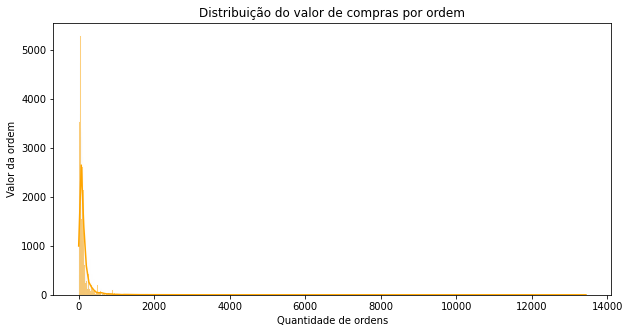

In [138]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final, x = 'total_price', kde=True, color='orange')
ax.set_title('Distribuição do valor de compras por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

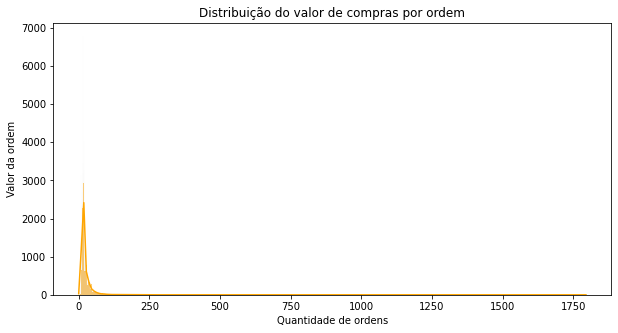

In [139]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final, x = 'total_freight', kde=True, color='orange')
ax.set_title('Distribuição do valor de compras por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

In [140]:
#Boxplot com Pyplot Express para identificar mais claramente os outliers
fig = px.box(df_final, y="total_freight", points="all",
             title = "Distribuição do Percentual de Compras de Produtos Gold por usuário - Foco Outliers")

fig.show()

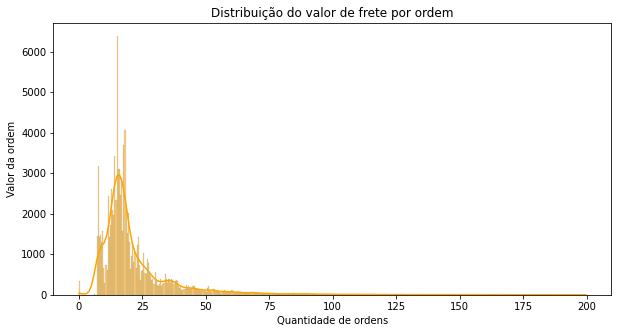

In [141]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final[df_final['total_freight'] < 200], x = 'total_freight', kde=True, color='orange')
ax.set_title('Distribuição do valor de frete por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

In [142]:
tabela_frequencia_categoria(df_final,'qty_products')

Atributos,Distribuicao,Frequencia (%)
1.0,"88,863.00",90.06
2.0,"7,516.00",7.62
3.0,"1,322.00",1.34
4.0,505.00,0.51
5.0,204.00,0.21
6.0,198.00,0.20
7.0,22.00,0.02
8.0,8.00,0.01
10.0,8.00,0.01
12.0,5.00,0.01


In [143]:
tabela_frequencia_categoria(df_final,'qty_uniq_products')

Atributos,Distribuicao,Frequencia (%)
1.0,"95,430.00",96.72
2.0,"2,846.00",2.88
3.0,298.00,0.30
4.0,70.00,0.07
6.0,10.00,0.01
5.0,8.00,0.01
7.0,3.00,0.00
8.0,1.00,0.00


In [144]:
aux_df_final['mean_photos_order'] = round(aux_df_final['mean_photos_order'],0)
aux_df_final['mean_reviews'] = round(aux_df_final['mean_reviews'],0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
tabela_frequencia_categoria(aux_df_final,'mean_photos_order')

Atributos,Distribuicao,Frequencia (%)
1.0,"47,755.00",49.09
2.0,"19,542.00",20.09
3.0,"11,120.00",11.43
4.0,"7,696.00",7.91
5.0,"4,930.00",5.07
6.0,"3,406.00",3.50
7.0,"1,389.00",1.43
8.0,680.00,0.70
10.0,318.00,0.33
9.0,281.00,0.29


In [146]:
tabela_frequencia_categoria(df_final,'qty_reviews')

Atributos,Distribuicao,Frequencia (%)
1.0,"99,001.00",99.62
2.0,379.00,0.38
3.0,3.00,0.00


In [147]:
tabela_frequencia_categoria(aux_df_final,'mean_reviews')

Atributos,Distribuicao,Frequencia (%)
5.0,"57,048.00",57.40
4.0,"19,144.00",19.26
1.0,"11,724.00",11.80
3.0,"8,228.00",8.28
2.0,"3,239.00",3.26


In [148]:
tabela_frequencia_categoria(df_final,'with_voucher')

Atributos,Distribuicao,Frequencia (%)
0.0,"95,574.00",96.11
1.0,"3,866.00",3.89


In [149]:
tabela_frequencia_categoria(df_final,'qty_payment_methods')

Atributos,Distribuicao,Frequencia (%)
1.0,"97,194.00",97.74
2.0,"2,246.00",2.26


In [150]:
tabela_frequencia_categoria(df_final,'purchase_hour')

Atributos,Distribuicao,Frequencia (%)
16,"6,675.00",6.71
11,"6,578.00",6.61
14,"6,569.00",6.61
13,"6,518.00",6.55
15,"6,454.00",6.49
21,"6,217.00",6.25
20,"6,193.00",6.23
10,"6,177.00",6.21
17,"6,150.00",6.18
12,"5,995.00",6.03


In [151]:
df_aux_hr = pd.DataFrame(df_final['purchase_hour'])
df_aux_hr.sort_values(by='purchase_hour', ascending=True, inplace = True)

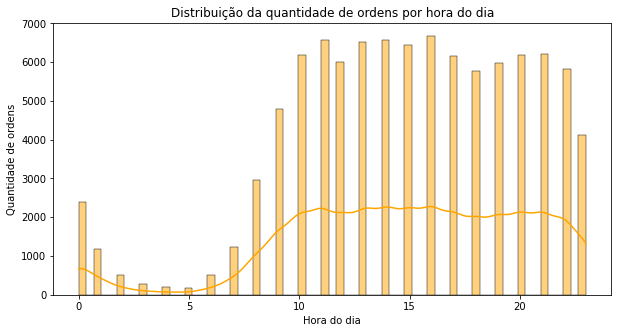

In [152]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_aux_hr, x = 'purchase_hour', kde=True, color='orange')
ax.set_title('Distribuição da quantidade de ordens por hora do dia')
ax.set_ylabel('Quantidade de ordens')
ax.set_xlabel('Hora do dia')
ax.figure.set_size_inches(10, 5)

### Dataset dos cancelados

In [153]:
#K = número de intervalos de categoria para auxiliar em análises, utilizando a Regra de Sturges
k = int(1 + ((10/3) * np.log10(len(df_final_cancel))))

aux_df_final_cancel = df_final_cancel
#1.
aux_df_final_cancel['classe_total_price'] = pd.cut(x = aux_df_final_cancel['total_price'], bins = k, include_lowest=True)

In [154]:
tabela_frequencia_categoria(aux_df_final_cancel,'classe_total_price')

Atributos,Distribuicao,Frequencia (%)
"(1.445, 423.664]",421.00,90.15
"(423.664, 841.287]",23.00,4.93
"(841.287, 1258.911]",9.00,1.93
"(1258.911, 1676.535]",5.00,1.07
"(1676.535, 2094.158]",4.00,0.86
"(2094.158, 2511.782]",3.00,0.64
"(4182.276, 4599.9]",1.00,0.21
"(2511.782, 2929.405]",1.00,0.21
"(3764.653, 4182.276]",0.00,0.00
"(3347.029, 3764.653]",0.00,0.00


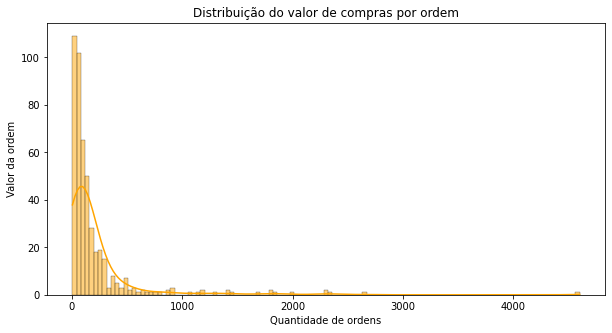

In [155]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final_cancel, x = 'total_price', kde=True, color='orange')
ax.set_title('Distribuição do valor de compras por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

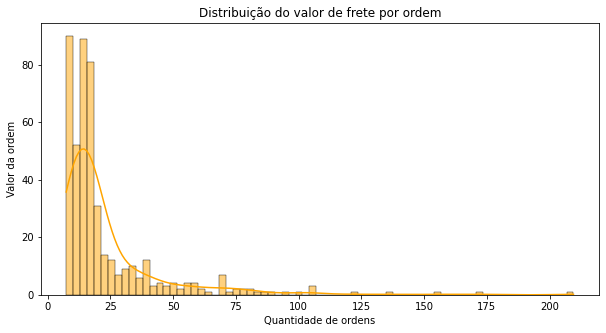

In [156]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_final_cancel, x = 'total_freight', kde=True, color='orange')
ax.set_title('Distribuição do valor de frete por ordem')
ax.set_ylabel('Valor da ordem')
ax.set_xlabel('Quantidade de ordens')
ax.figure.set_size_inches(10, 5)

In [157]:
tabela_frequencia_categoria(df_final_cancel,'qty_products')

Atributos,Distribuicao,Frequencia (%)
1.0,425.00,91.01
2.0,27.00,5.78
5.0,7.00,1.50
6.0,3.00,0.64
3.0,3.00,0.64
4.0,2.00,0.43


In [158]:
tabela_frequencia_categoria(df_final_cancel,'qty_uniq_products')

Atributos,Distribuicao,Frequencia (%)
1.0,462.00,98.93
2.0,5.00,1.07


In [159]:
tabela_frequencia_categoria(df_final_cancel,'mean_photos_order')

Atributos,Distribuicao,Frequencia (%)
1.0,237.00,52.32
2.0,92.00,20.31
3.0,45.00,9.93
4.0,37.00,8.17
6.0,18.00,3.97
5.0,15.00,3.31
7.0,5.00,1.10
8.0,2.00,0.44
9.0,1.00,0.22
1.5,1.00,0.22


In [160]:
tabela_frequencia_categoria(df_final_cancel,'qty_reviews')

Atributos,Distribuicao,Frequencia (%)
1.0,"1,175.00",99.58
2.0,5.00,0.42


In [161]:
tabela_frequencia_categoria(df_final_cancel,'with_voucher')

Atributos,Distribuicao,Frequencia (%)
0.0,"1,113.00",90.19
1.0,121.00,9.81


In [162]:
tabela_frequencia_categoria(df_final_cancel,'purchase_hour')

Atributos,Distribuicao,Frequencia (%)
10,94.00,7.62
13,87.00,7.05
15,84.00,6.81
19,83.00,6.73
16,81.00,6.56
11,80.00,6.48
14,78.00,6.32
20,77.00,6.24
12,77.00,6.24
17,76.00,6.16


In [163]:
df_aux_hr_cancel = pd.DataFrame(df_final_cancel['purchase_hour'])
df_aux_hr_cancel.sort_values(by='purchase_hour', ascending=True, inplace = True)

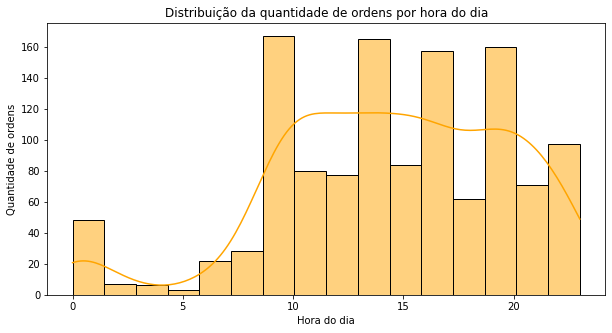

In [164]:
#histograma contendo a distribuição dos valores totais das ordens
ax = sns.histplot(data = df_aux_hr_cancel, x = 'purchase_hour', kde=True, color='orange')
ax.set_title('Distribuição da quantidade de ordens por hora do dia')
ax.set_ylabel('Quantidade de ordens')
ax.set_xlabel('Hora do dia')
ax.figure.set_size_inches(10, 5)

## Machine Learning: Classificação dos dados

In [165]:
data_class = df_final.drop(columns=['order_id', 'classe_total_price']).fillna(0)
data_class.describe()

,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order,qty_reviews,mean_reviews,with_voucher,qty_payment_methods,purchase_hour,target
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
mean,136.680481,22.645685,1.132833,1.030008,2.201999,1.003288,4.069770,0.038877,1.022576,14.770829,0.012409
std,210.172081,21.659564,0.545666,0.243344,1.752356,0.067115,1.360989,0.193304,0.148616,5.326800,0.110705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,13.720000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,1.000000,11.000000,0.000000
50%,85.000000,17.090000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000,15.000000,0.000000
75%,149.900000,23.920000,1.000000,1.000000,3.000000,1.000000,5.000000,0.000000,1.000000,19.000000,0.000000
max,13440.000000,1794.960000,21.000000,8.000000,20.000000,3.000000,5.000000,1.000000,2.000000,23.000000,1.000000


In [166]:
#Dividindo o dataset em treino (70%) e teste (30%)
X_train_class, X_test_class =  train_test_split(data_class,test_size = 0.3, random_state=None)

dados_treino_class = X_train_class
dados_teste_class = X_test_class

In [167]:
#Separando as variáveis em um dataset e o target em outro

dados = X_train_class.drop(columns='target').values
resultado = X_train_class['target'].values

#array com os nomes das features
feature_names = np.array(data_class.columns)
#array com os nomes dos resultados
target = np.array([1,0])

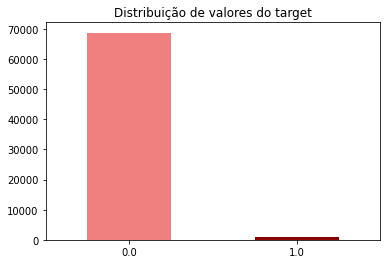

In [168]:
#Avaliando o Balanceamento das features de target
ax = X_train_class['target'].value_counts().plot.bar(rot=0, color = ['lightcoral', 'darkred'])
ax.set_title('Distribuição de valores do target');

### Algoritmos de Classificação

#### Treino

Para diminuir a diferença entre as classes, irei fazer a seleção aleatória do mesmo quantitativo de itens com o target 0 e manter todos os itens com target 1.

In [169]:
data_class_1 = data_class[data_class['target']==1]
data_class_0 = data_class[data_class['target']==0]
new_data_class_0 = data_class_0.sample(n=data_class[data_class['target']==1].count()[0])

In [170]:
new_data_class = pd.concat([data_class_1,new_data_class_0])
new_data_class.describe()

,total_price,total_freight,qty_products,qty_uniq_products,mean_photos_order,qty_reviews,mean_reviews,with_voucher,qty_payment_methods,purchase_hour,target
count,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000,2468.000000
mean,109.036989,15.655320,0.788088,0.711507,1.491491,0.980956,2.833063,0.066856,1.024311,14.619935,0.500000
std,236.591105,19.885008,0.696325,0.503169,1.735070,0.156088,1.809225,0.249823,0.154045,5.268298,0.500101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000
50%,49.000000,13.895000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,15.000000,0.500000
75%,126.652500,18.930000,1.000000,1.000000,2.000000,1.000000,5.000000,0.000000,1.000000,19.000000,1.000000
max,4599.900000,325.040000,6.000000,3.000000,12.000000,2.000000,5.000000,1.000000,2.000000,23.000000,1.000000


In [171]:
#Dividindo novamente o dataset em treino (70%) e teste (30%)
X_train_class, X_test_class =  train_test_split(new_data_class,test_size = 0.3, random_state=None)

dados_treino_class = X_train_class
dados_teste_class = X_test_class

In [172]:
#Separando as variáveis em um dataset e o target em outro

dados = X_train_class.drop(columns='target').values
resultado = X_train_class['target'].values

#array com os nomes das features
feature_names = np.array(data_class.columns)
#array com os nomes dos resultados
target = np.array([1,0])

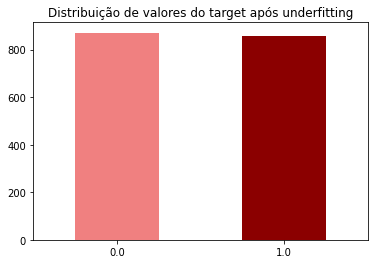

In [173]:
#Avaliando o Balanceamento das features de target
ax = X_train_class['target'].value_counts().plot.bar(rot=0, color = ['lightcoral', 'darkred'])
ax.set_title('Distribuição de valores do target após underfitting');

In [174]:
#Usando o classificador SVM
clf_svm = SVC()
#Usando o classificador Random Forest
clf_rf = RandomForestClassifier()

#Validação cruzada nos 3 classificadores 
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_svm = cross_validate(clf_svm, dados, resultado, cv=4, scoring=scoring_list)
scores_rf = cross_validate(clf_rf, dados, resultado, cv=4, scoring=scoring_list)
#scores_tree = cross_validate(clf_tree, dados, resultado, cv=4, scoring=scoring_list)

avg_scores_svm = []
avg_scores_rf = []
#avg_scores_tree = []

for score in scoring_list:
    avg_scores_svm.append(scores_svm['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    #avg_scores_tree.append(scores_tree['test_'+score].mean())

print('SVM - ', avg_scores_svm)
print('Random Forest - ', avg_scores_rf)
#print('Decision Tree - ', avg_scores_tree)

SVM -  [0.7961754532955228, 0.8191765894594947, 0.7950386694936249, 0.7919427708230043]
Random Forest -  [0.890552494199536, 0.8909208156778152, 0.890498690964494, 0.8905105662511953]


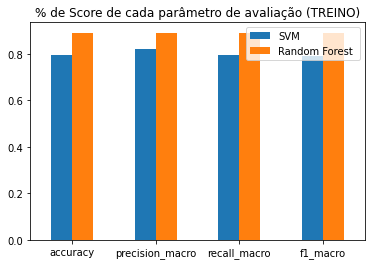

In [175]:
df_results = pd.DataFrame({'SVM': avg_scores_svm,
                   'Random Forest ': avg_scores_rf}
                   , index=scoring_list)
                   #,'Decision Tree': avg_scores_tree}, index=scoring_list)
ax = df_results.plot.bar(rot=0)
ax.set_title('% de Score de cada parâmetro de avaliação (TREINO)');

Text(0, 0.5, 'Importancia')

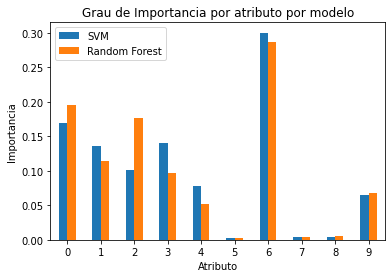

In [180]:
#avaliando importancia dos atributos por classificador
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(dados, resultado)

importance_rf = clf_rf.feature_importances_

clf_svm = RandomForestClassifier(n_estimators=50)
clf_svm = clf_svm.fit(dados, resultado)

importance_svm = clf_svm.feature_importances_

# clf_tree = RandomForestClassifier(n_estimators=50)
# clf_tree = clf_tree.fit(dados, resultado)

# importance_tree = clf_tree.feature_importances_

df_importances = pd.DataFrame({'SVM': importance_svm,
                   'Random Forest': importance_rf})
                   #,'Decision Tree': importance_tree})
ax = df_importances.plot.bar(rot=0)
ax.set_title('Grau de Importancia por atributo por modelo')
ax.set_xlabel('Atributo')
ax.set_ylabel('Importancia')

#### Teste

In [177]:
#Separando as variáveis em um dataset e o target em outro

dados = X_test_class.drop(columns='target').values
resultado = X_test_class['target'].values

#array com os nomes das features
feature_names = np.array(data_class.columns)
#array com os nomes dos resultados
target = np.array([1,0])

In [178]:
#Rodando os algoritmos de classificação com a base de teste
#Usando o classificador SVM
clf_svm = SVC()
#Usando o classificador Random Forest
clf_rf = RandomForestClassifier()
#Usando o classificador Arvore de Decisão
#clf_tree = tree.DecisionTreeClassifier()

#Validação cruzada nos 3 classificadores 
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_svm = cross_validate(clf_svm, dados, resultado, cv=4, scoring=scoring_list)
scores_rf = cross_validate(clf_rf, dados, resultado, cv=4, scoring=scoring_list)
#scores_tree = cross_validate(clf_tree, dados, resultado, cv=4, scoring=scoring_list)

avg_scores_svm = []
avg_scores_rf = []
#avg_scores_tree = []

for score in scoring_list:
    avg_scores_svm.append(scores_svm['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    #avg_scores_tree.append(scores_tree['test_'+score].mean())

print('SVM - ', avg_scores_svm)
print('Random Forest - ', avg_scores_rf)
#print('Decision Tree - ', avg_scores_tree)

SVM -  [0.7813644289450741, 0.7990007864451358, 0.7837127598045851, 0.7790191367496206]
Random Forest -  [0.8947253705318221, 0.8963457015338809, 0.8949262306065218, 0.8946019114798002]


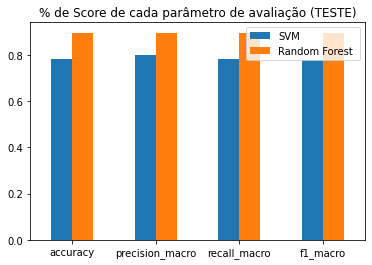

In [179]:
df_results = pd.DataFrame({'SVM': avg_scores_svm,
                   'Random Forest ': avg_scores_rf}, index=scoring_list)
                   #,'Decision Tree': avg_scores_tree}, index=scoring_list)
ax = df_results.plot.bar(rot=0)
ax.set_title('% de Score de cada parâmetro de avaliação (TESTE)');